Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Head:
   vitamin_a  vitamin_c     fiber   type
0  70.783510  35.779827  8.313735   root
1  54.353822  49.421245  5.989785  fruit
2   8.172535  82.824925  1.149330  fruit
3  45.830064  33.520805  0.938573  leafy
4  48.469629  17.376159  9.096268   root

Evaluation Metrics:
Accuracy: 0.27
Precision: 0.25
Recall: 0.28


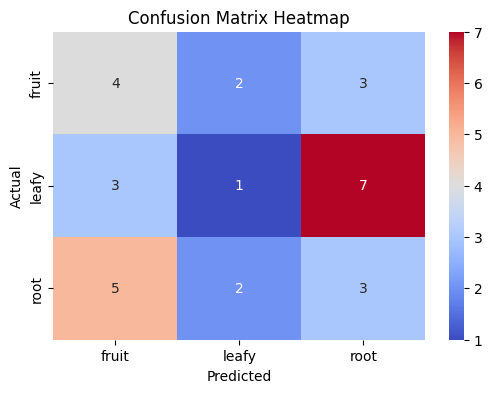

In [4]:

# 2. Import libraries
#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 3. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 4. Load the dataset from Drive
# 👉 Make sure your 'vegetables.csv' file is placed in "My Drive/Colab Notebooks"
file_path = '/content/drive/MyDrive/Colab Notebooks/vegetables.csv'
df = pd.read_csv(file_path)

# 5. Preview the dataset
print("Dataset Head:")
print(df.head())

# 6. Preprocess the data
# Drop non-numeric and non-feature columns like 'Name' (if present)
# Drop the target column from features
X = df.drop(columns=['type'], errors='ignore')

# Set the target column
y = df['type']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# 8. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 9. Make predictions
y_pred = model.predict(X_test)

# 10. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# 11. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
